# LIF model

In [ ]:
# Common neuron model parameters
DT = 0.1
V_REST = -70.0
V_RESET = -65.0
FIRING_THRESHOLD = -50
MEMBRANE_RESISTANCE = 10.0
MEMBRANE_TIME_SCALE = 8.0
ABSOLUTE_REFRACTORY_PERIOD = 2.0
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 69, 84]
SYNAPSE_STRENGTH = 75.0

In [ ]:
from _spark import simulate_LIF_model_spark
from _brian2 import simulate_LIF_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_LIF_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	v_rest = V_REST * b2.mV,
	v_reset = V_RESET * b2.mV,
	firing_threshold = FIRING_THRESHOLD * b2.mV,
	membrane_resistance = MEMBRANE_RESISTANCE * b2.Mohm,
	membrane_time_scale = MEMBRANE_TIME_SCALE * b2.ms,
	abs_refractory_period = ABSOLUTE_REFRACTORY_PERIOD * b2.ms
)

spark_times, spark_potentials, spark_spikes = simulate_LIF_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
	dt = DT,
	synapse_strength = SYNAPSE_STRENGTH,
	potential_rest = V_REST,
	potential_reset = V_RESET,
	potential_tau = MEMBRANE_TIME_SCALE,
	resistance = MEMBRANE_RESISTANCE,
	threshold = FIRING_THRESHOLD,
	cooldown = ABSOLUTE_REFRACTORY_PERIOD - DT,
    offset = V_REST,
)

In [ ]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    FIRING_THRESHOLD,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Leaky Integrate-and-Fire Model Comparison',
)

# AdEx model

In [ ]:
# Common neuron model parameters
DT = 0.1
MEMBRANE_TIME_SCALE_TAU_M = 5.0
MEMBRANE_RESISTANCE_R = 500.0
V_REST = -70.0
V_RESET = -51.0
RHEOBASE_THRESHOLD_V_RH = -50.0
SHARPNESS_DELTA_T = 2.0
ADAPTATION_VOLTAGE_COUPLING_A = 0.5
ADAPTATION_TIME_CONSTANT_TAU_W = 100.0
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B = 7.0
FIRING_THRESHOLD_V_SPIKE = -30.0
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 69, 84]
SYNAPSE_STRENGTH = 75.0

In [ ]:
from _spark import simulate_AdEx_model_spark
from _brian2 import simulate_AdEx_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_AdEx_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	tau_m = MEMBRANE_TIME_SCALE_TAU_M * b2.ms,
	R = MEMBRANE_RESISTANCE_R * b2.Mohm,
	v_rest = V_REST * b2.mV,
	v_reset = V_RESET * b2.mV,
	v_rheobase = RHEOBASE_THRESHOLD_V_RH * b2.mV,
	a = ADAPTATION_VOLTAGE_COUPLING_A * b2.nS,
	b = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B * b2.pA,
	firing_threshold = FIRING_THRESHOLD_V_SPIKE * b2.mV,
	delta_T = SHARPNESS_DELTA_T * b2.mV,
	tau_w = ADAPTATION_TIME_CONSTANT_TAU_W * b2.ms,
)

spark_times, spark_potentials, spark_spikes = simulate_AdEx_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
	dt = DT,
	synapse_strength = SYNAPSE_STRENGTH,
	potential_rest = V_REST,
	potential_reset = V_RESET,
	potential_tau = MEMBRANE_TIME_SCALE_TAU_M,
	resistance = MEMBRANE_RESISTANCE_R,
	threshold = FIRING_THRESHOLD_V_SPIKE,
	rheobase_threshold = RHEOBASE_THRESHOLD_V_RH,
	spike_slope = SHARPNESS_DELTA_T,
	adaptation_tau = ADAPTATION_TIME_CONSTANT_TAU_W,
	adaptation_delta = SPIKE_TRIGGERED_ADAPTATION_INCREMENT_B / 1000, # pA -> nA
	adaptation_subthreshold = ADAPTATION_VOLTAGE_COUPLING_A / 1000,	# nS -> µS
    offset = V_REST,
)

In [ ]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    RHEOBASE_THRESHOLD_V_RH,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Adaptive Exponential Model Comparison',
)

# HH model

In [9]:
# Common neuron model parameters
DT = 0.1
INPUT_SPIKE_TIMES = [10, 20, 30, 32, 34, 36, 38, 55, 60, 62, 69, 84]
SYNAPSE_STRENGTH = 100.0
CM = 1
E_LEAK = 10.6
E_NA = 115
E_K = -12
G_LEAK = 0.3
G_NA = 120
G_K = 36
THRESHOLD = 30

In [10]:
from _spark import simulate_HH_model_spark
from _brian2 import simulate_HH_model_brian
import brian2 as b2

b2_times, b2_potentials, b2_spikes = simulate_HH_model_brian(
	spike_times = INPUT_SPIKE_TIMES,
	synapse_strength = SYNAPSE_STRENGTH,
	t_max = 100.0,
	dt = DT,
	c_m = CM * b2.ufarad, #/(b2.cm**2)
	e_leak = E_LEAK * b2.mV,
	e_k = E_K * b2.mV,
	e_na = E_NA * b2.mV,
	g_leak = G_LEAK * b2.msiemens,
	g_na = G_NA  * b2.msiemens,
	g_k = G_K  * b2.msiemens,
	threshold = THRESHOLD * b2.mV,
)

spark_times, spark_potentials, spark_spikes = simulate_HH_model_spark(
    spike_times = INPUT_SPIKE_TIMES,
    dt = DT,
	synapse_strength = SYNAPSE_STRENGTH,
	c_m = CM,
	e_leak = E_LEAK,
	e_k = E_K,
	e_na = E_NA,
	g_leak = G_LEAK,
	g_na = G_NA,
	g_k = G_K,
    threshold = THRESHOLD,
    offset = -70,
)

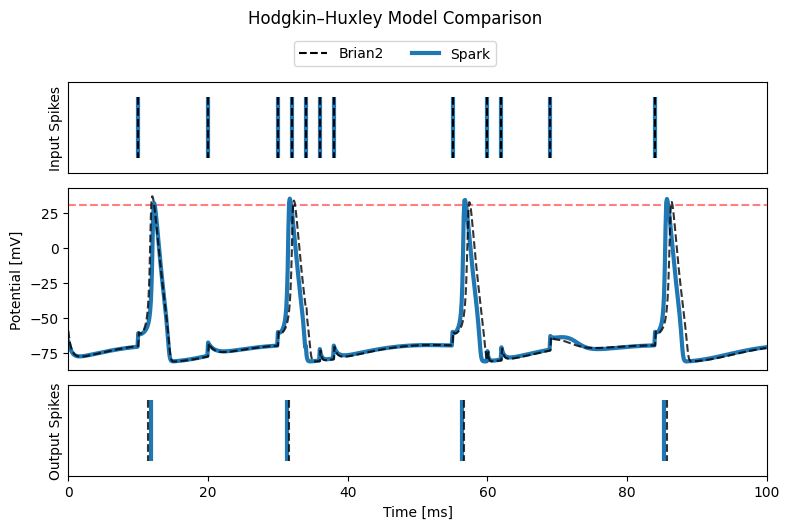

In [11]:
from _plotting import single_neuron_plots

single_neuron_plots(
    INPUT_SPIKE_TIMES,
    THRESHOLD,
    spark_times,
    spark_potentials,
    spark_spikes,
    b2_times,
    b2_potentials,
    b2_spikes,
    'Hodgkin–Huxley Model Comparison',
)
